<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Machine_learning_regression/blob/main/insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET :  INSURANCE PRICE PREDICTION

**Task:**

Number of features are 6 based on which we have predict the insurance Price

|Column discription|
|:-:|
|age|
|sex|
|bmi|
|children|
|smoker|
|region|
|charges|



# inporting libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [51]:
## reading csv file as dataframe "Data"
data = pd.read_csv("/content/insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
## Infomation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
## checking the null values:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
## duplicated values:
print(data.shape)
print(f"total duplicate values : {data.duplicated().sum()}")
data[data.duplicated()]


(1338, 7)
total duplicate values : 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [55]:
data.corr()

<ipython-input-55-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [56]:
## removing the duplicate index:
data_copy = data.copy()
data_copy = data_copy.drop(index=581)

In [57]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
## making changes into data_copy dataframe
data_copy["charges"] =np.round(data_copy["charges"], 2)

In [59]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.663452,6.100468,15.96,26.29,30.40,34.70,53.13
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
charges,1337.0,13279.121503,12110.359677,1121.87,4746.34,9386.16,16657.72,63770.43


In [60]:
feature = data_copy.drop("charges",axis=1)
target = data_copy["charges"]

In [61]:
feature.sample()

,age,sex,bmi,children,smoker,region
275,47,female,26.6,2,no,northeast


In [62]:
target.sample()

707    10264.44
Name: charges, dtype: float64

In [63]:
print(f"the shape of data_copy dataframe : {data_copy.shape}")
print(f"the duplicated value in data_copy dataframe : {data_copy.duplicated().sum()}")

print(f"the shape of feature dataframe : {feature.shape}")
print(f"the shape of target dataframe : {target.shape}")

the shape of data_copy dataframe : (1337, 7)
the duplicated value in data_copy dataframe : 0
the shape of feature dataframe : (1337, 6)
the shape of target dataframe : (1337,)


## everything seems good let explore the data:

In [64]:

## segregating the data into numerical and categories:
# Initialize an empty list to store numeric column names
num_col = []

# Iterate through columns and check if they are numeric
for i in feature.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        num_col.append(i)
    else:
        pass
# Create a new DataFrame containing only numeric columns
data_num = data[num_col]



In [65]:
data_num.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [66]:
# description of data_num
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


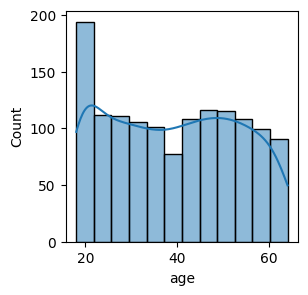

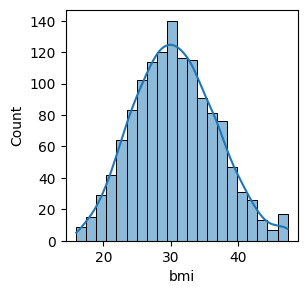

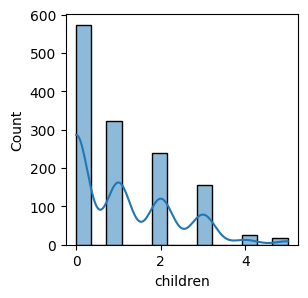

In [86]:
for i in data_num.columns:
    plt.figure(figsize=(3,3))
    sns.histplot(data_num[i], kde=True)
    # Show the plot
    plt.show()

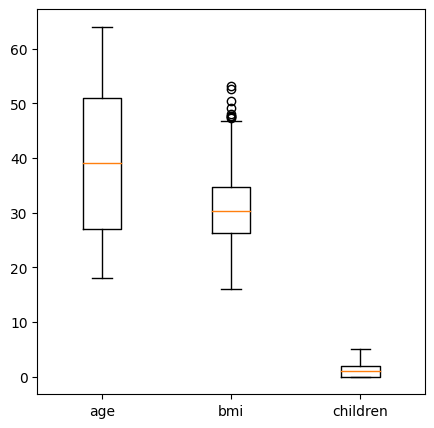

In [70]:
##boxplot for data_num
plt.figure(figsize=(5, 5))
plt.boxplot(data_num,labels=data_num.columns);


In [71]:
print(f"data_num mim_BMI : {data_num.bmi.min()}")
print(f"data_num max_BMI : {data_num.bmi.max()}")

data_num mim_BMI : 15.96
data_num max_BMI : 53.13


In [82]:
## quantile :
q1 = np.percentile(data_num["bmi"], 25)
q3 = np.percentile(data_num["bmi"], 75)
IQR= q3-q1
## higher bound:
higher_bound = q3 + (1.5 * IQR)
higher_bound = np.round(higher_bound,2)
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR : {IQR}")
print(f"higher_bound: {higher_bound}")



Q1 (25th percentile): 26.29625
Q3 (75th percentile): 34.69375
IQR : 8.3975
higher_bound: 47.29


In [83]:
## total count where value greater than higher bound
data_num[data_num.bmi > higher_bound].count()

age         9
bmi         9
children    9
dtype: int64

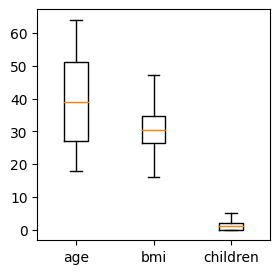

In [85]:
## iterating over datnum_charges for replacing the value have more than higher bound
for i in range(len(data_num['bmi'])):
    if data_num['bmi'].iloc[i] > higher_bound:
        data_num['bmi'].iloc[i] = higher_bound

plt.figure(figsize=(3,3))
plt.boxplot(data_num,labels=data_num.columns);


<Figure size 300x300 with 0 Axes>

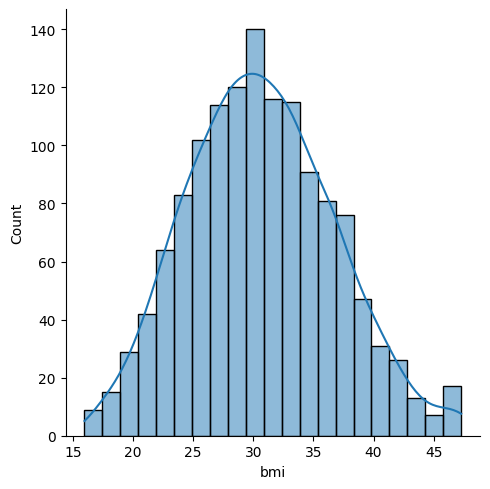

In [88]:
plt.figure(figsize=(3,3))
sns.displot(data_num["bmi"], kde=True)

## making changes into data_copy dataframe

In [90]:
## creting list of column for conversion:
COLUMN_LIST=["sex","region","smoker"]

## converting categories into numerical data:
for i in COLUMN_LIST:
    feature = pd.get_dummies(feature, columns=[i])

## calling function categorical_to_numerical:
feature.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,0,0,1,0,1
1,18,33.770,1,0,1,0,0,1,0,1,0
2,28,33.000,3,0,1,0,0,1,0,1,0
3,33,22.705,0,0,1,0,1,0,0,1,0
4,32,28.880,0,0,1,0,1,0,0,1,0


## TRAIN TEST SPLIT

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Train test split:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
print(f"x_train_shape:{x_train.shape}")
print(f"x_test_shape:{x_test.shape}")
print(f"y_train_shape:{y_train.shape}")
print(f"y_test_shape:{y_test.shape}")

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


x_train_shape:(1069, 11)
x_test_shape:(268, 11)
y_train_shape:(1069,)
y_test_shape:(268,)


## Using Linear regression :)

> Indented block



In [94]:
## importing linear regression form sklearn linear
from sklearn.linear_model import LinearRegression
# Fitting linear model:
reg = LinearRegression().fit(x_train, y_train)



In [95]:
# coefficients indicate the impact of each feature on the predicted target variable.
coefficients = reg.coef_
print(coefficients)

[   248.210718      318.70146527    533.00996009     50.77084889
    -50.77084889    472.45534951     80.69351902   -366.46454052
   -186.68432802 -11538.88227401  11538.88227401]


### Note :

These coefficients indicate how much the target variable is expected to change for a one-unit change in each corresponding feature, assuming all other features remain constant.

In [96]:
# NOTE:  The intercept term represents the predicted value of the target variable when all feature variables are zero.
reg.intercept_

-76.9968724223927

In [98]:
## making the predictions:
y_pred = reg.predict(x_test)

In [101]:
print(y_pred.ndim)
print(y_test.ndim)

result = pd.DataFrame({'Actual': y_test, 'Predict' : np.round(y_pred,2)})
result

1
1


,Actual,Predict
900,8688.86,8143.69
1064,5708.87,5737.12
1256,11436.74,14369.31
298,38746.36,31745.51
237,4463.21,8962.39
...,...,...
534,13831.12,16753.41
542,13887.20,15274.57
760,3925.76,6454.70
1284,47403.88,38467.16


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result, *[[['Actual', 'Predict']]], **{})
chart

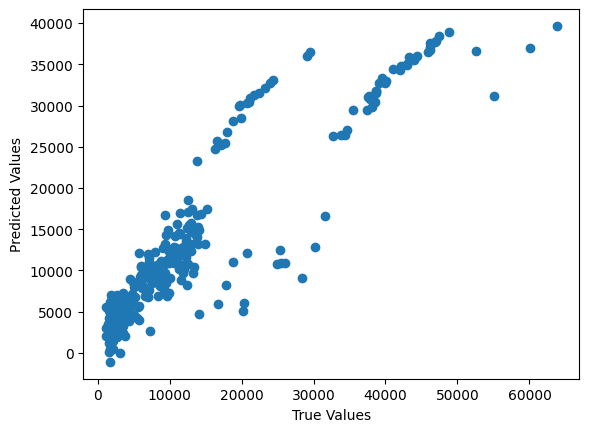

In [124]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [107]:
residual = y_test - y_pred
residual

900      545.165973
1064     -28.245548
1256   -2932.574533
298     7000.846399
237    -4499.176894
           ...     
534    -2922.286730
542    -1387.365585
760    -2528.939437
1284    8936.722828
1285     210.599567
Name: charges, Length: 268, dtype: float64

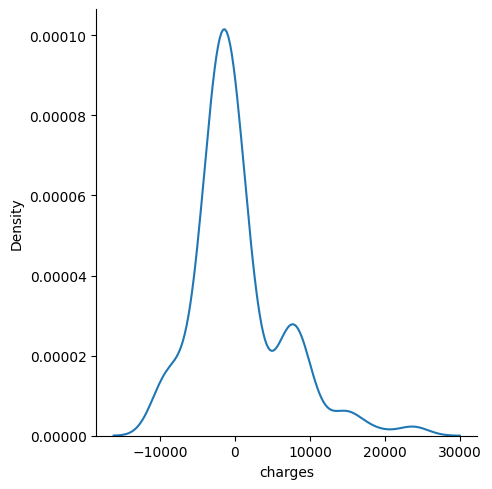

In [114]:
sns.displot(residual,kind="kde")

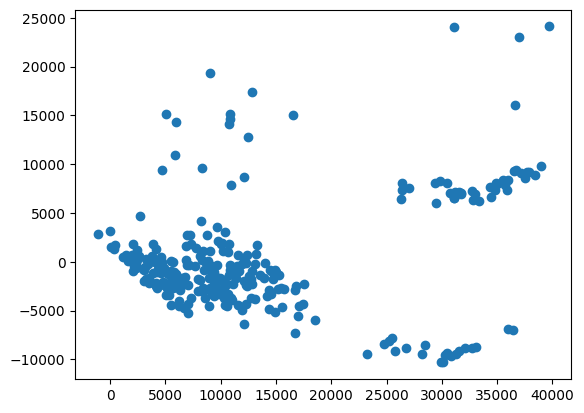

In [115]:
plt.scatter(y_pred,residual)

##applying cost functions:

In [135]:

## importing performance matrics

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")

## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{(rmse)}")
## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")

mean_square_error : 35478021.507997215
Root_mean_squared_error:5956.3429642690335
mean_absolute_error : 4177.0


## perfomance matrics:

In [123]:

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p=10
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")


R-squared: 0.806928706020837
Adjusted R-squared: 0.8


----
---
##Conclusion:

- An (R^2) value of 0.80 indicates that approximately 80% of the variability in the dependent variable (target) can be explained by the independent variables (features) in above model.

**Here's what it means in more detail:**

|**Interpretation of (R^2)**|
|:-|
|An \(R^2\) value ranges from 0 to 1,|
|* 0 means that the model does not explain any of the variability in the target variable.
     * 1 means that the model perfectly predicts the target variable.|
     
<br>     
**(R^2) of 80 (or 0.80 when expressed as a decimal) suggests that the model is able to explain 80% of the variability in the target variable.**



<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>

# Machine_learning_regression


---
---
## Linear Regression:

 - Linear regression is a statistical method that models the relationship between a dependent variable (often denoted as y) and one or more independent variables (often denoted as x).
 -  It assumes that the relationship between the variables can be approximated by a linear function.

```
Expressed as:  y=mx+b

y is the dependent variable (the one we're trying to predict)
x is the independent variable (the one we're using to make predictions)
m is the slope of the regression line, representing the change in y for a unit change in x
b is the intercept of the regression line, representing the predicted value of y when x is 0
```
- linear regression aims to find the best-fitting line (or hyperplane in higher dimensions) through the data points. This is done by minimizing the sum of squared differences (or residuals) between the actual and predicted values of y.

**Equation of the Straight line:**
  
- y = mx+b can be written as:  
y = β<sub>0</sub>+ β<sub>1</sub>x


|Where:|
|:-|
|y is the dependent variable (the one we're trying to predict)|
|x is the independent variable (the one we're using to make predictions)|
|β<sub>0</sub>is the intercept term.|
|β<sub>1</sub> is the coefficient associated with the independent variable x|



let's assume that intercept = 0

the graph will be like:

![intercept_0_image](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/b858d628-4fb5-43d2-9c57-f4c7ca2e8d92)


<br><br>

---
## **Cost function:**

1. The expression, <h2>J(θ<sub>0</sub>θ<sub>1</sub>) = <sup>n</sup>∑<sub>i=1</sub> (h<sub>0</sub>(x<sub>i</sub>) - y<sub>i</sub>)<sup>2</sup></h2> represents the cost function for a linear regression model,

   |Where:|
   |:-|
   |J(θ<sub>0</sub>θ<sub>1</sub>) is the cost function|
   |θ<sub>0</sub>θ<sub>1</sub> are the parameters (intercept and slope) of the linear regression model|
   |n is the number of data points|
   |h<sub>0</sub>(x<sub>i</sub>) is the predicted value for the i-th data point|
    |y<sub>i</sub> is the actual target value for the i-th data point|

2.  This cost function is also known as the Mean Squared Error (MSE) and is commonly used for evaluating the performance of a linear regression model.

3. The goal of training a linear regression model is to find the values of
θ<sub>0</sub> and θ<sub>1</sub>  that minimize this cost function. This is typically done using optimization techniques like gradient descent.

4. In practical terms, the cost function measures how well the model's predictions (h<sub>0</sub>(x<sub>i</sub>)) align with the actual target values (y<sub>i</sub>).
   - It quantifies the discrepancy between predicted and actual values, with larger discrepancies resulting in higher cost values.

5. The process of training the model involves adjusting the parameters (θ<sub>0</sub> and θ<sub>1</sub>) iteratively to minimize this cost function.
   - When the cost function reaches a minimum, the model provides the best fit to the data.

|<h3>Cost_Function</h3>||
|:-:|:-:|
|Mean_Square_Error|<h4>MSE = <sup>n</sup>∑<sub>i=1</sub> (Y<sub>i</sub> - &#374;<sub>i</sub>)<sup>2</sup> / n </h4>|
|Mean_Absolute_Error|<h4>MAE = <sup>n</sup>∑<sub>i=1</sub> IY<sub>i</sub> - &#374;<sub>i</sub>I / n</h4>|
|Root_Mean_Squared_Error|<h4>RMSE = √(MAE)</h4>|
where, n = (number of datapoints)

<br>
<br>

#### 1. MSE [Mean_Square_Error]

**Advantages**

1. MSE equation is differentiable:
  - Because the MSE is a quadratic function (ax<sup>2</sup>+by+c) of the differences between actual and predicted values, it is differentiable.
  - This means that its derivative can be computed with respect to the parameters (e.g., the model's weights or coefficients).
  - This property enables the use of gradient-based optimization methods to find the set of parameters that minimize the MSE, leading to an accurate model.

2. MSE always has a Global minima:
   - This is because the MSE is a continuous and convex function with respect to the model parameters.
   - global minimum is the lowest value of a function over its entire domain. It means that no other point in the function's domain has a lower value.

     
![global minima](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/f035d464-c3a1-4f5c-acf9-fff76fbc4ef0)
global minima is a convex function

![local minima](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/025ce040-bb53-4ca2-8395-ba805420585a)
local minima is a nonconvex function

why local minima is a disadvantage while global minima not?
 - As plotted above, there are two depths in the local minima plot, the one with extreme depth is the global minima and the smaller depth is the local minima as the slope
   keep getting updated to reach the global minima (i.e. to reduce the error margin and increase the accuracy) meanwhile, some functions get stuck and
   unable to get an update due to the negligible change in weights so unable to reach the global minima or we can say unable to reduce the error margin rate.

- convex function does not have this problem
   
**Disadvantages**
  - MSE is not robust to outliers
  - MSE function penalizes the error.


#### 2. MAE [Mean_Absolute_Error]
|Advantages:| Disadvantages|
|:-|:-|
| Robust to Outliers|Convergence usually takes more time (more computational time to reach minima)|
|Always in the same unit(+ve)|May Mask the Scale of Errors: If there are a few very large errors in the dataset, the average might not accurately represent the typical error. In such cases, a metric that penalizes larger errors more (like MSE) might provide a better assessment.|


#### 3. RMSE [Root_Mean_Squared_Error]
|Advantages:| Disadvantages|
|:-|:-|
|- Interpretability: RMSE is in the same unit as the dependent variable, which makes it easy to interpret. For example, if you're predicting house prices in dollars, the RMSE will also be in dollars |- sensitive to outliers|
|Smoothness of Optimization Landscape: It is a smooth function that is differentiable almost everywhere, which makes it well-suited for mathematical optimization procedures.|Non-Negative Values Only: RMSE doesn't work well if your data can have negative values, as it squares the errors.|


---

## Performance metric for LinerRegression:
|<h3>Performance_matric</h3>|
|:-:|
|R<sup>2</sup>|
|Adjusted R<sup>2</sup>|


## 1. **R<sup>2</sup> [R_Square]:**
   - is calculated as the ratio of the explained variance to the total variance. It is often computed as

```
 R^2 = 1-(Sum of Squared Errors (SSE)/Total Sum of Squares (SST))

​where
   SSE is the sum of the squared differences between the actual and predicted values,
   SST is the total sum of squared differences between the actual values and the mean of the dependent variable.
```


|**Interpretation of (R<sup>2</sup>)**|
|:-|
|An (R<sup>2</sup>) value ranges from 0 to 1,|
|* 0 means that the model does not explain any of the variability in the target variable.|
|* 1 means that the model perfectly predicts the target variable.|
|* if  R<sup>2</sup> is negative than it is worst model


## 2. **Adjusted (R<sup>2</sup>)**
- Adjusted R-squared addresses a limitation of regular R-squared. R-squared tends to increase as more predictors are added to the model, even if those predictors do not significantly improve the model's explanatory power. Adjusted R-squared penalizes excessive use of predictors that do not add value.
- The formula for adjusted R-squared is:  1 − ((1-R<sup>2</sup>)(n-1) /(n−p−1))
    - where n is the number of observations and p is the number of predictors in the model.

- Interpretation:
    - R<sup>2</sup>ranges from −∞ to 1.
    - A higher R<sup>2</sup> indicates a better fit.
    - A negative R<sup>2</sup> implies that the model is worse than a model that simply predicts the mean of the dependent variable for all observations.
    - Adjusted R-squared will be less than or equal to R-squared.
    - If adding a new predictor improves the model, both R-squared and adjusted R-squared will increase. If the new predictor does not improve the model, R-squared may increase but adjusted R-squared will stay the same or decrease.

​





---

Example:

since, h<sub>0</sub>(x<sub>i</sub>) = θ<sub>0</sub> + θ<sub>1</sub>x  (if intercept is 0)

then, h<sub>0</sub>(x<sub>i</sub>) =  θ<sub>1</sub>x

if θ<sub>1</sub> = 0.5 and x = [1,2,3]


|x|h<sub>0</sub>(x<sub>i</sub>) = θ<sub>1</sub>x||
|:-|:-|:-|
|For x<sub>1</sub> =1:| 0.5 * 1| = 0.5|
|For x<sub>2</sub> = 2:|0.5 * 2| = 1.0|
|For x<sub>3</sub> = 3:|0.5 * 3| = 1.5|


![example theta](https://github.com/MANOJ-S-NEGI/Machine_learning_regression/assets/99602627/28035a49-2680-4602-aa85-4b7c7b37c941)

 j(θ<sub>1</sub>) = ((0.3-1)<sup>2</sup> + (1-2)<sup>2</sup>  + (1.5-3)<sup>2</sup> /3)

  j(θ<sub>1</sub>) = (0.49+1+2.25)/3

 j(θ<sub>1</sub>) ≈1.25

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
___
___
